In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
import os, sys
import re
import json
import glob
import datetime
from collections import Counter

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from nltk.corpus import stopwords
from wordcloud import WordCloud

In [4]:
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import SlackDataLoader
from src.draw import Visualize
import src.utils as utils

## Insight Extraction

Below are some useful questions to answer. Feel free to explore to answer other interesting questions that may be of help to get insight about student's behaviour, need, and future performance 

In [5]:

paths = [
    '/home/biniyam/tenx-tasks/tenxdata/all-week8',
    '/home/biniyam/tenx-tasks/tenxdata/all-week9'
]
parsed_data = SlackDataLoader.slack_parser(paths)

# Find the user with the highest reply count
user_reply_counts = parsed_data.groupby('sender_name')['reply_count'].sum()
user_with_highest_replies = user_reply_counts.idxmax()
highest_reply_count = user_reply_counts.max()

print(f"The user with the highest number of reply counts is: {user_with_highest_replies} with {highest_reply_count} replies.")


The user with the highest number of reply counts is: Katie Dickerson with 19 replies.


Top and Bottom 10 by Reply counts

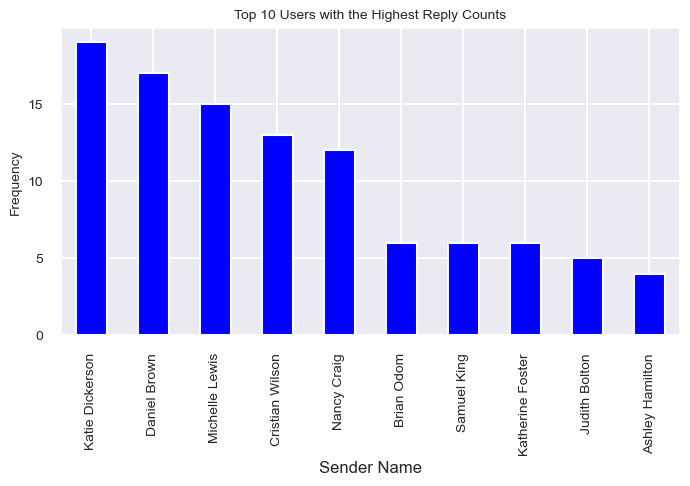

In [10]:
sns.set_style('darkgrid')
sns.set_context('talk')

reply_counts = parsed_data.groupby('sender_name')['reply_count'].sum().sort_values(ascending=False)
reply_counts[:10].plot(kind='bar', figsize=(8, 4), color='blue')
plt.title('Top 10 Users with the Highest Reply Counts', size=10)
plt.xlabel("Sender Name", size=12); plt.ylabel("Frequency", size=10);
plt.xticks(size=10); plt.yticks(size=10);
plt.show()


In [7]:
parsed_data_cleaned = parsed_data.dropna(subset=['reply_count'])

user_reply_counts = parsed_data.groupby('sender_name')['reply_count'].sum()
top_10_users_replies = user_reply_counts.nlargest(10)


# Plotting top 10 users with their reply counts
plt.figure(figsize=(10, 5))
fig.suptitle('Top 10 Users - Reply Counts', fontsize=15)

top_10_users_replies_sorted = top_10_users_replies.sort_values()
top_10_users_replies_sorted.plot(kind='barh', color='skyblue')
plt.xlabel('Reply Count')
plt.title('Top 10 Users - Reply Counts')



# Displaying top 10 users' reply counts
for i, v in enumerate(top_10_users_replies_sorted):
    plt.text(v + 1, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()


NameError: name 'fig' is not defined

<Figure size 1000x500 with 0 Axes>

In [ ]:
# # Plotting bottom 10 users with their reply counts

bottom_10_users_replies = user_reply_counts.nsmallest(10)
bottom_10_users_replies_sorted = bottom_10_users_replies.sort_values()

bottom_10_users_df = bottom_10_users_replies_sorted.reset_index()

# bottom_10_users_df.columns = ['sender_name', 'reply_count']
# bottom_10_users_df['replies'] = bottom_10_users_df['reply_count']


#PLOTTING THESE WAS A BAD IDEA

# bottom_10_users_replies_sorted.plot(kind='barh', ax=axs[1], color='salmon')
# axs[1].set_xlabel('Reply Count')
# axs[1].set_title('Bottom 10 Users - Reply Counts')

# # Displaying bottom 10 users' reply counts
# for i, v in enumerate(bottom_10_users_replies_sorted):
#     axs[1].text(v + 1, i, str(v), color='black', va='center')

# plt.tight_layout()
# plt.show()

bottom_10_users_df.head(10)

,sender_name,reply_count
0,Allison Thompson,0
1,Amy Leon,0
2,April Lucas,0
3,Brady Rhodes,0
4,Brittany Garcia,0
5,Carlos Gross,0
6,Debra Lawrence,0
7,Garrett Bell,0
8,Gary Thomas,0
9,Jennifer Foley,0


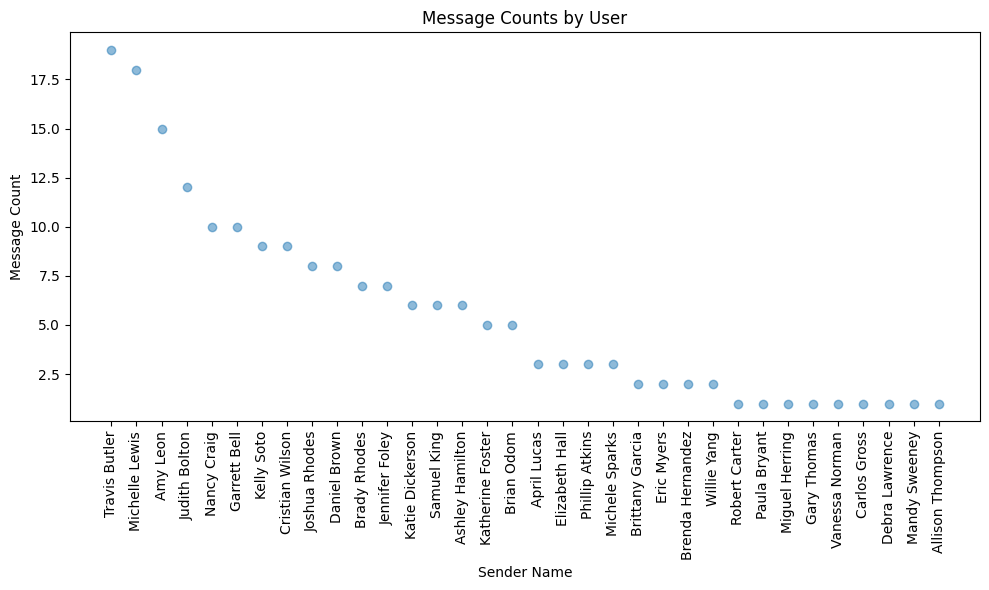

In [ ]:
# User with the most messages
user_message_counts = parsed_data['sender_name'].value_counts()

user_message_counts_df = pd.DataFrame({'sender_name': user_message_counts.index, 'message_count': user_message_counts.values})

plt.figure(figsize=(10, 6))
plt.scatter(user_message_counts_df['sender_name'], user_message_counts_df['message_count'], alpha=0.5)
plt.xlabel('Sender Name')
plt.ylabel('Message Count')
plt.title('Message Counts by User')
plt.xticks(rotation=90)  # Rotating x-axis labels for better readability if needed
plt.tight_layout()
plt.show()

## Top 10 Users with most messages

<Figure size 1000x800 with 0 Axes>

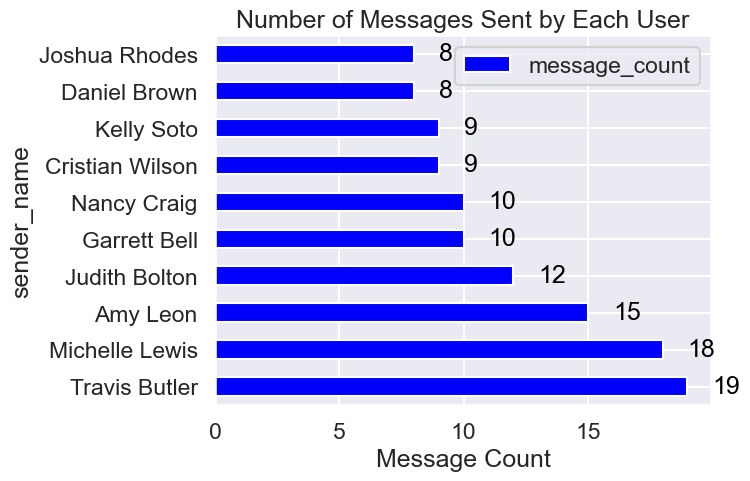

In [11]:
# Counting the number of messages sent by each user
user_message_counts = parsed_data.groupby('sender_name').size()

top_10_users = user_message_counts.nlargest(10)

user_message_counts_df = pd.DataFrame({'message_count': top_10_users.values}, index=top_10_users.index)

# Plotting the horizontal bar plot with annotations
sns.set_style('darkgrid')
sns.set_context('talk')
plt.figure(figsize=(10, 8))
ax = user_message_counts_df.sort_values('message_count', ascending=False).plot(kind='barh', color='blue')
plt.xlabel('Message Count')
plt.title('Number of Messages Sent by Each User')

# Annotating counts near each bar
for i, (index, value) in enumerate(user_message_counts_df.iterrows()):
    ax.text(value['message_count'] + 1, i, str(value['message_count']), color='black', va='center')

plt.show()

## Bottom 10 with message count

In [ ]:
#USERS WITH LESS messages than everyone

bottom_10_users_msg_df = pd.DataFrame({'sender_name': top_10_users.index, 'message_count': top_10_users.values})
bottom_10_users_msg_df.head(10)

# Rename columns
bottom_10_users_msg_df.columns = ['sender_name', 'message_count']
bottom_10_users_msg_df.head(10)




#PLOTTING THIS WAS A BAD IDEA TOO 

# user_message_counts_df = pd.DataFrame({'message_count': top_10_users.values}, index=top_10_users.index)\


# # Plotting the horizontal bar plot
# plt.figure(figsize=(10, 8))
# ax = user_message_counts_df.sort_values('message_count', ascending=False).plot(kind='barh', color='skyblue')
# plt.xlabel('Message Count')
# plt.title('Number of Messages Sent by Each User')

# for i, (index, value) in enumerate(user_message_counts_df.iterrows()):
#     ax.text(value['message_count'] + 1, i, str(value['message_count']), color='black', va='center')
# plt.show()

,sender_name,message_count
0,Travis Butler,19
1,Michelle Lewis,18
2,Amy Leon,15
3,Judith Bolton,12
4,Garrett Bell,10
5,Nancy Craig,10
6,Cristian Wilson,9
7,Kelly Soto,9
8,Daniel Brown,8
9,Joshua Rhodes,8


## Top and Bottom 10 by mention

In [ ]:
#Top 10 users with the highest number of mentions
mention_counts = parsed_data['msg_content'].str.count('@U\w+')

user_mention_counts = mention_counts.groupby(parsed_data['sender_name']).sum().sort_values(ascending=False)

top_10_users_mentions = user_mention_counts.nlargest(10)
top_10_users_mentions_df = pd.DataFrame({'sender_name': top_10_users_mentions.index, 'mention_count': top_10_users_mentions.values})
top_10_users_mentions_df.head(10)

,sender_name,mention_count
0,Travis Butler,5
1,Katherine Foster,5
2,Jennifer Foley,5
3,Daniel Brown,4
4,Ashley Hamilton,3
5,Brady Rhodes,3
6,Katie Dickerson,3
7,Cristian Wilson,3
8,Kelly Soto,2
9,Brian Odom,2


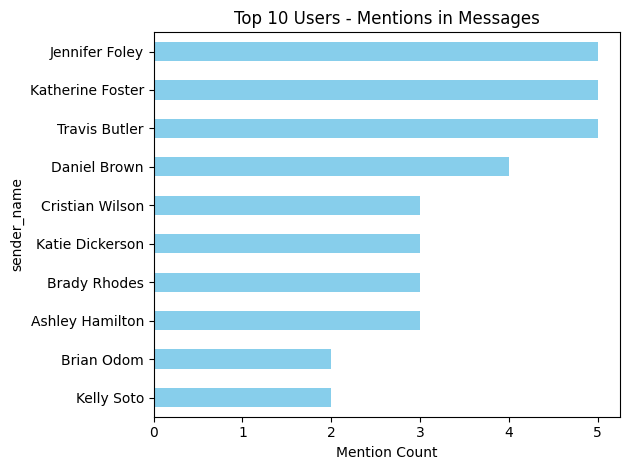

In [ ]:
#now plot
plt.Figure(figsize=(10, 6))

# Top 10 users by mention count
top_10_users_mentions.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Mention Count')
plt.title('Top 10 Users - Mentions in Messages')


plt.tight_layout()
plt.show()

In [ ]:
# # Bottom 10 users by mention count
bottom_10_users_mentions = user_mention_counts.nsmallest(10)
bottom_10_users_mentions_df = pd.DataFrame({'sender_name': bottom_10_users_mentions.index, 'mention_count': bottom_10_users_mentions.values})
bottom_10_users_mentions_df.head(10)


,sender_name,mention_count
0,Paula Bryant,0
1,Samuel King,0
2,Vanessa Norman,0
3,Miguel Herring,0
4,Allison Thompson,0
5,Mandy Sweeney,0
6,Garrett Bell,0
7,Eric Myers,0
8,Debra Lawrence,0
9,Carlos Gross,0


In [ ]:
parsed_data.groupby(['channel', 'sender_name']).size().sort_values(ascending=False)

reply_counts = parsed_data.groupby(['channel', 'sender_name'])['reply_count'].sum().sort_values(ascending=False)

top_users_per_channel = reply_counts.groupby('channel').nlargest(10)

top_users_per_channel_df = pd.DataFrame({'reply_count': top_users_per_channel.values}, index=top_users_per_channel.index)
top_users_per_channel_df.head(10)


reply_count
channel   channel   sender_name                 
all-week8 all-week8 Cristian Wilson           11
                    Nancy Craig                8
                    Michelle Lewis             7
                    Brian Odom                 6
                    Daniel Brown               6
                    Elizabeth Hall             4
                    Travis Butler              2
                    Joshua Rhodes              1
                    Amy Leon                   0
                    Vanessa Norman             0

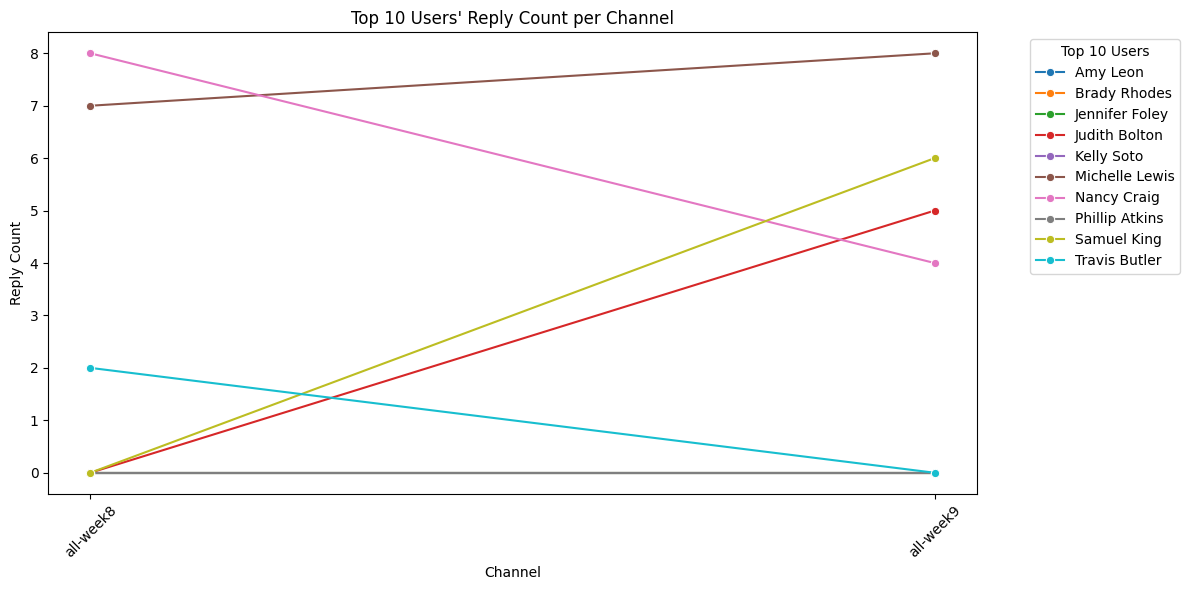

In [ ]:
top_users_per_channel = reply_counts.apply(lambda x: x.nlargest(10))

# Reshape the data for Seaborn's lineplot
top_users_per_channel = top_users_per_channel.stack().reset_index()
top_users_per_channel.columns = ['Channel', 'User', 'Reply Count']

top_users_list = top_users_per_channel['User'].value_counts().nlargest(10).index
top_users_per_channel = top_users_per_channel[top_users_per_channel['User'].isin(top_users_list)]


# Create a line plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Channel', y='Reply Count', hue='User', data=top_users_per_channel, marker='o')

# for line in range(0, top_users_per_channel.shape[0]):
#     plt.text(top_users_per_channel['Channel'][line], top_users_per_channel['Reply Count'][line],
#              f"{top_users_per_channel['User'][line]} ({top_users_per_channel['Reply Count'][line]})",
#              horizontalalignment='right', verticalalignment='bottom', fontsize='small')

plt.title('Top 10 Users\' Reply Count per Channel')
plt.xlabel('Channel')
plt.ylabel('Reply Count')
plt.xticks(rotation=45)
plt.legend(title='Top 10 Users', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

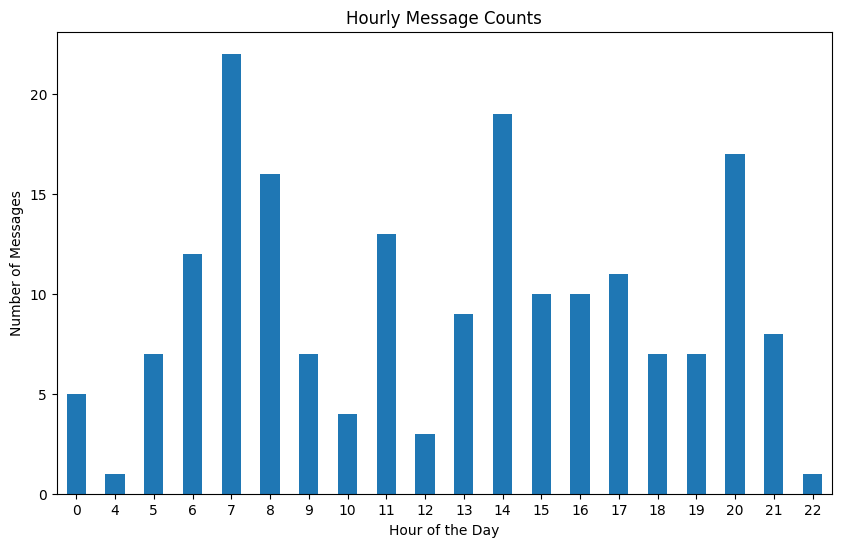

The hour with the most messages is 7:00 with 22 messages.


In [ ]:
# Convert 'msg_sent_time' column to datetime format
parsed_data['msg_sent_time'] = pd.to_datetime(parsed_data['msg_sent_time'], unit='s')

# Extract hour from message timestamps
parsed_data['hour_sent'] = parsed_data['msg_sent_time'].dt.hour

# Group messages by hour and count the number of messages in each hour
hourly_message_count = parsed_data.groupby('hour_sent').size()

# Find the hour with the maximum number of messages
hour_peak = hourly_message_count.idxmax()
max_messages = hourly_message_count.max()

# Visualize hourly message counts
hourly_message_count.plot(kind='bar', figsize=(10, 6))
plt.title('Hourly Message Counts')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.xticks(rotation=0)
plt.show()

print(f"The hour with the most messages is {hour_peak}:00 with {max_messages} messages.")

##### What are the top 10 messages by 
- Reactions
- Replies
- Mentions


In [ ]:
#parsing the reactions before making a df
paths = [
    '/home/biniyam/tenx-tasks/tenxdata/all-week8',
    '/home/biniyam/tenx-tasks/tenxdata/all-week9'
]

parsed_reaction_data = SlackDataLoader.parse_slack_reaction(paths)
parsed_reaction_data['reaction_count'] = parsed_reaction_data['reaction_name'].apply(len)

reaction_counts = parsed_reaction_data.groupby('message')['reaction_count'].sum().sort_values(ascending=False)
top_10_messages_by_reactions = reaction_counts.nlargest(10)
top_10_messages_by_reactions_df = pd.DataFrame({'messages': top_10_messages_by_reactions.index, 'reaction_count': top_10_messages_by_reactions.values})
top_10_messages_by_reactions_df.head(10)



,messages,reaction_count
0,<@U03UJGP0C68> <@U03UUR571A5> <@U03V785NLSU> p...,70
1,,64
2,Good morning everyone :blush: welcome to week ...,41
3,"Good morning winners, welcome to week 9 of wee...",38
4,Just an update on the data from Gokada CEO Olu...,20
5,"don't confuse it with it's literal meaning, <@...",16
6,it is something that has monetary value and wh...,16
7,but for the driver_location data the unique on...,16
8,```pip install matplotlib==3.2.2```,16
9,1pm UTC tomorrow please,16


#### Printing the top 10 Messages by reactions

In [ ]:
top_10_messages_by_reactions_df.columns = ['messages', 'reaction_count']

print("Top 10 Messages by Reaction count")
print("=================================")

for idx, row in top_10_messages_by_reactions_df.iterrows():
    print(f"{row['messages']}: {row['reaction_count']} reactions")
    print("--------------------------------------")

Top 10 Messages by Reaction count
<@U03UJGP0C68> <@U03UUR571A5> <@U03V785NLSU> presented to Olutosin and killed it.  He was super impressed.

Big congrats to all of you guys.: 70 reactions
--------------------------------------
: 64 reactions
--------------------------------------
Good morning everyone :blush: welcome to week 8 of 12.  Wishing you all a productive week ahead : 41 reactions
--------------------------------------
Good morning winners, welcome to week 9 of week 12 of this intensive training. We commend your resilience and perseverance as you sail through the thick and thin of this training. You’ve been pushing since the day you applied for this training and you never cease to push to get your tasks done. We are proud of you! You’ve started seeing some rays of light inside the tunnel - in the coming weeks, you’ll eventually see the light at the end of the tunnel. Do have a great week ahead :blush:: 38 reactions
--------------------------------------
Just an update on the d

In [ ]:
#Top 10 messages by replies
top_10_replies = parsed_data.nlargest(10, 'reply_count')[['msg_content', 'reply_count']]

#PLOTTING THIS WAS A BAD IDEA TOO

# top_10_replies = top_10_replies[::-1]

# plt.figure(figsize=(10, 15))
# plt.barh(top_10_replies['msg_content'], top_10_replies['reply_count'], color='skyblue')
# plt.xlabel('Reply Count', size=12)
# plt.ylabel('Message Content', size=12)
# plt.title('Top 10 Messages by Reply Count', size=14)
# plt.tight_layout()
# plt.show()

print("Top 10 messages by reply count:")
print("================================")
for idx, row in top_10_replies.iterrows():
    print(f"Reply Count: {row['reply_count']} - Message: {row['msg_content']}")
    print("--------------------------------")



Top 10 messages by reply count:
Reply Count: 18 - Message: How could I join the two tables? do they have a common attribute that can I use to merge them together?
--------------------------------
Reply Count: 11 - Message: Hey <@U03UJGP0C68> try this
pip install causalnex==0.11.0
--------------------------------
Reply Count: 8 - Message: can i get a recorded tutorial of today’s  back testing?
--------------------------------
Reply Count: 7 - Message: During reading I witness a term (Security) in most of the provided docs, can anyone explain it?
--------------------------------
Reply Count: 6 - Message: When is the second tutorial scheduled for today
--------------------------------
Reply Count: 6 - Message: when cloning a repo, what's the difference between using git@gitrepolink and gitrepolink when cloning repo?
--------------------------------
Reply Count: 6 - Message: what about career exercise?
--------------------------------
Reply Count: 5 - Message: on the delivery_request data 

In [ ]:
# Count mentions in messages
mention_counts = parsed_data['msg_content'].str.count(r'@\w+')

# Add mention_counts to the DataFrame
parsed_data['mention_count'] = mention_counts

# Find the top 10 messages with the highest mention counts
top_10_messages_mentions = parsed_data.nlargest(10, 'mention_count')[['msg_content', 'mention_count']]
top_10_messages_mentions.head(10)

,msg_content,mention_count
79,<@U03UJGP0C68> <@U03UUR571A5> <@U03V785NLSU> p...,3
140,what is the python version you used to create ...,3
158,<@U03UL5LSTG9> <@U03TT5KEYCF> <@U03U4GULU3Y>,3
67,u mean <https://github.com/> vs <mailto:git@gi...,2
80,<@U03TX2VN6H5> @challenge document what is the...,2
3,Thank you <@U03UJKJGRAQ>,1
5,<@U03TEPYRM2P> can we ?,1
6,I joined late due to internet issues. I would ...,1
13,"don't confuse it with it's literal meaning, <@...",1
15,<@U03V6HMRPGQ> yeah,1


In [ ]:
#Message counts per channel dataframe
message_counts_per_channel = parsed_data['channel'].value_counts(ascending=True)
message_counts_df = message_counts_per_channel.reset_index()
message_counts_df.columns = ['channel', 'count']
message_counts_df.head()

,channel,count
0,all-week8,79
1,all-week9,110


### Which channel has the highest activity? 
- Which channel appears at the right top corner when you plot a 2D scatter plot where x-axis is
    the number of messages in the channel, y-axis is the sum of number of replies and reactions,
    and the color representing channels?


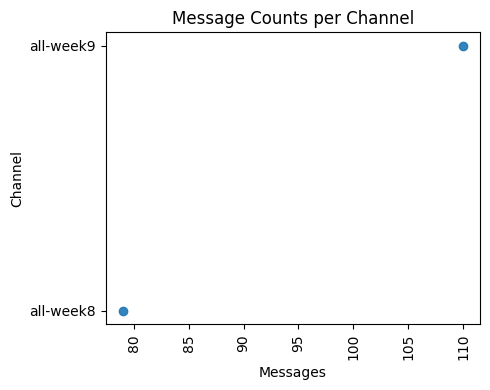

In [ ]:
#plot of which channel has more activity in a 2d plot

plt.figure(figsize=(5, 4))
plt.scatter(message_counts_df['count'],message_counts_df['channel'], alpha=0.9)
plt.xlabel('Messages')
plt.ylabel('Channel')
plt.title('Message Counts per Channel')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Turns out all-week0 had the most activity

### What fraction of messages are replied within the first 5mins?
- Plot a 2D scatter plot such that x-axis is the time difference between the message timestamp and the first reply message, y-axis is the time of the day (in 24hr format), color representing channels? 


In [ ]:
parsed_data['msg_sent_time'] = pd.to_datetime(parsed_data['msg_sent_time'], unit='s')
parsed_data['time_thread_start'] = pd.to_datetime(parsed_data['time_thread_start'], unit='s')

# Filter messages where thread start time is not zero
thread_start_messages = parsed_data[parsed_data['time_thread_start'] != pd.to_datetime(0)]

# Calculate time difference between message sent time and thread start time
thread_time_difference = thread_start_messages['time_thread_start'] - thread_start_messages['msg_sent_time']

# Filter messages with time difference less than or equal to 5 minutes
messages_within_5_min = thread_start_messages[thread_time_difference <= pd.Timedelta(minutes=5)]


In [ ]:
#filter messages with time difference less than or equal to 5 minutes
messages_within_5_min = thread_start_messages[thread_time_difference <= pd.Timedelta(minutes=5)]
#calculate the fraction of messages replied within 5 minutes
fraction_replied_within_5_min = len(messages_within_5_min) / len(parsed_data) if len(parsed_data) != 0 else 0
print(f"Fraction of messages replied within 5 minutes: {fraction_replied_within_5_min*100}")

Fraction of messages replied within 5 minutes: 85.71428571428571


/tmp/ipykernel_6613/4176232056.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


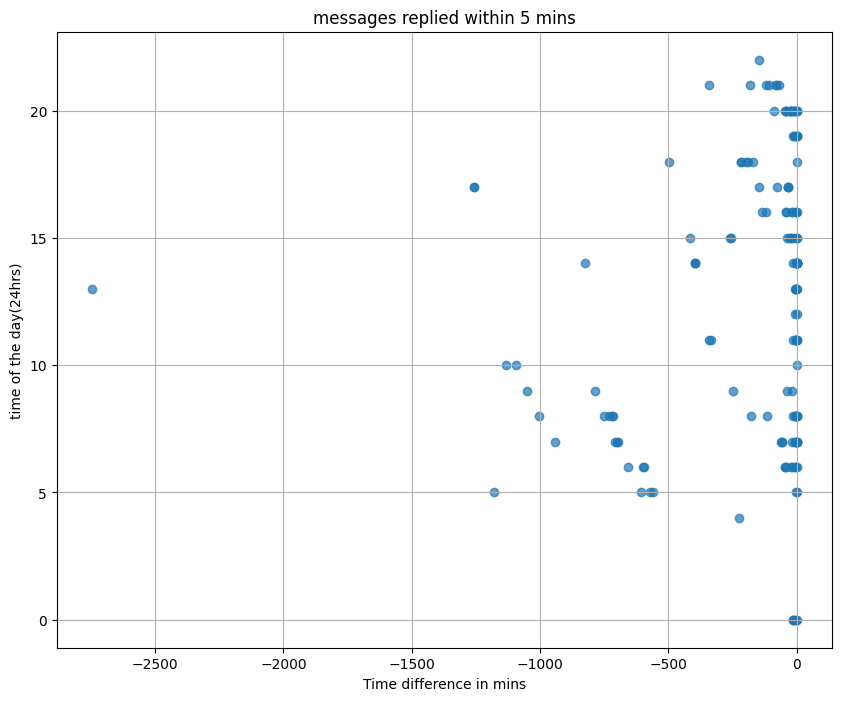

In [ ]:
messages_within_5_min['hour_sent'] = messages_within_5_min['msg_sent_time'].dt.hour

plt.figure(figsize=(10,8))
plt.scatter(
    (messages_within_5_min['time_thread_start'] - messages_within_5_min['msg_sent_time']).dt.total_seconds() / 60,
    messages_within_5_min['hour_sent'],
    # c=messages_within_5_min['channel_label'],
    cmap='viridis',
    alpha=0.7
)

plt.xlabel('Time difference in mins')
plt.ylabel('time of the day(24hrs)')
plt.title('messages replied within 5 mins')

# plt.colorbar(label='Channel')
plt.grid(True)
plt.show()

In [ ]:
#Failed attempt at creating a correlation matrix

# msg_counts_df = pd.DataFrame({'channel': message_counts_per_channel.index, 'message_count': message_counts_per_channel.values})
# pivot_df = message_counts_df.pivot_table(index='channel', columns='channel', values='count', fill_value=0)




# plt.figure(figsize=(10, 6))
# c = pivot_df.corr()
# sns.heatmap(c, annot=False)
# plt.title('Correlation Matrix of Channels and their Message Counts')
# plt.show()


In [ ]:
reply_counts_per_channel = parsed_data.groupby('channel')['reply_count'].sum().sort_values(ascending=False)
reply_counts_per_channel_df = reply_counts_per_channel.reset_index()
reply_counts_per_channel_df.columns = ['channel', 'reply_count']
reply_counts_per_channel_df.head(15)

,channel,reply_count
0,all-community-building,3062
1,all-career-exercises,460
2,all-week1,372
3,all-week7,264
4,all-week3,256
5,all-week4,180
6,all-broadcast,179
7,adludios-challange,178
8,all-week5,177
9,random,169


In [ ]:
# parsed_data = pd.DataFrame()
unique_channels = parsed_data['channel'].unique()
unique_channels_list = unique_channels.tolist()
print(unique_channels_list)

In [ ]:
# what kind of messages are replied faster than others?


In [ ]:
# Relationship between # of messages and # of reactions

In [ ]:
# Classify messages into different categories such as questions, answers, comments, etc.

In [ ]:
# Which users got the most reactions?

In [ ]:
# Model topics mentioned in the channel

In [ ]:
# What are the topics that got the most reactions?

### Harder questions to look into

In [ ]:
# Based on messages, reactions, references shared, and other relevant data such as classification of questions into techical question, comment, answer, aorder stu the python, statistics, and sql skill level of a user?